In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
!nvidia-smi

Sun Feb 19 19:23:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |   5864MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install simpletransformers==0.51.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.special import softmax
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#The classification report visualizer displays the precision, recall, F1, and support scores for the model
from sklearn.metrics import classification_report
#using to plot confusion_matrix for each model 
from sklearn.metrics import plot_confusion_matrix
#this function computes  accuracy
from sklearn.metrics import accuracy_score

#this function Using to preprocessing  (Data)
from sklearn.preprocessing import LabelEncoder 
#This function Using to Split Data to train and test 
from sklearn.model_selection import train_test_split
#This function using to   visualisation (Data)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.decomposition import PCA
import re, string

import nltk
#This Function using to plot tree
from sklearn import tree
#This Function using to rank features in dataset
from sklearn.feature_selection import SelectFromModel


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_train = pd.read_excel("/content/drive/MyDrive/Final_only binary_Jazeera.xlsx")
#data_train=data_train.dropna()
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
data_train["label"].value_counts()

1.0    5825
0.0    3688
Name: label, dtype: int64

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data_train["text"], data_train["label"], test_size=0.20,shuffle=True ,random_state=42)

In [ ]:
#df_train=pd.DataFrame({"text":X_train,"label":y_train})
#df_test=pd.DataFrame({"text":X_test,"label":y_test})

In [ ]:
#df_train.to_csv("train.csv",index=False)
#df_test.to_csv("test.csv",index=False)

In [ ]:
df_train["label"].value_counts()

1.0    4667
0.0    2943
Name: label, dtype: int64

In [ ]:
df_test["label"].value_counts()

1.0    1158
0.0     745
Name: label, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import numpy as np
class_names = [0, 1]
def confusion_ma(y_true, y_pred):
  data = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(data, columns=class_names, index = class_names)
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.figure(figsize = (10,7))
  sn.set(font_scale=1.4)#for label size
  sn.heatmap(df_cm, cmap="Blues", annot=True,fmt='',annot_kws={"size": 16})# font size


In [ ]:
from simpletransformers.classification import ClassificationModel,ClassificationArgs,MultiModalClassificationModel, MultiModalClassificationArgs

In [ ]:
model_args = ClassificationArgs()
model_args.learning_rate = 3e-5
model_args.early_stopping_delta = 0.1
model_args.early_stopping_metric = "mcc"

model_args.num_train_epochs=2
model_args.train_batch_size=16
model_args.max_seq_length=128

model_args.overwrite_output_dir=True
model_args.regression=False
model_args.evaluate_during_training_verbose=True
model_args.save_model_every_epoch=True


# Create a ClassificationModel

model = ClassificationModel( "bert", "UBC-NLP/MARBERTV2",num_labels=2,use_cuda=True,args=model_args)
model2 = ClassificationModel( "bert", "aubmindlab/bert-base-arabertv02",num_labels=2,use_cuda=True,args=model_args)
model3 = ClassificationModel( "bert", "asafaya/bert-mini-arabic",num_labels=2,use_cuda=True,args=model_args)

Some weights of the model checkpoint at UBC-NLP/MARBERTV2 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initiali

### Train Model Without Handling Imbalanced Dataset

In [ ]:
# Train the model
model.train_model(df_train)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:390: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7610 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/476 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/476 [00:00<?, ?it/s]

(952, 0.5727813788885329)

In [ ]:
test=df_test["text"]

In [ ]:
test

0                               لحوم الحمير في الميزان
1       الحوثيون يسيطرون على مدينة قرب الحدود السعودية
2              رفض فلسطيني لتجزئة المفاوضات مع إسرائيل
3         كرواتيا: خاطفو الرهينة طلبوا فدية قبل إعدامه
4               السعودية تعلن ضبط معمل متفجرات بالرياض
                             ...                      
1898    55 قتيلا بمجزرة في دوما والغارات الروسية تتجدد
1899            الاتحاد الأوروبي يدعو لحل سياسي باليمن
1900         الحكومة اليمنية تبدأ بدمج المقاومة بالجيش
1901      حشود تهاجم الأعظمية ببغداد وتحرق الوقف السني
1902               إسرائيل تُقوِّض صناعة الأدوية بغزة‬
Name: text, Length: 1903, dtype: object

  0%|          | 0/1903 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

😆😆😆😆😆😆😆😆😆😆Evaluate the model on validation  data😆😆😆😆😆😆😆😆😆😆
accuracy_score=70.10%

precision_score=70.03%

f1_score=65.17%

recall_score=65.00%

😆😆😆😆😆😆😆😆😆😆classification_report😆😆😆😆😆😆😆😆😆😆
              precision    recall  f1-score   support

           0     0.4148    0.6991    0.5206       442
           1     0.8851    0.7016    0.7827      1461

    accuracy                         0.7010      1903
   macro avg     0.6500    0.7003    0.6517      1903
weighted avg     0.7759    0.7010    0.7219      1903

None


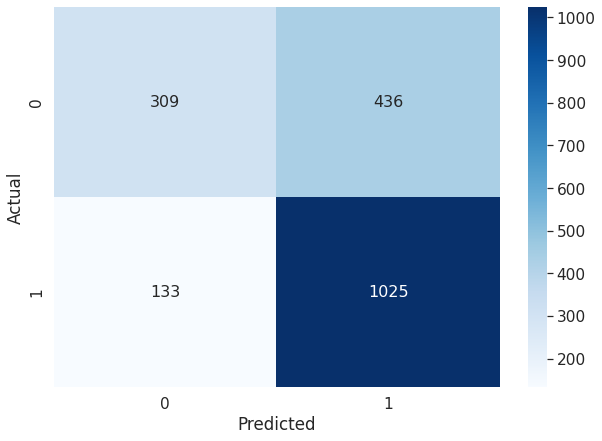

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(test)
fscore='{:.2%}\n'.format(f1_score(df_test["label"], predictions, average='macro'))
ACC='{:.2%}\n'.format(accuracy_score(df_test["label"], predictions))
pre='{:.2%}\n'.format(precision_score(df_test["label"], predictions, average='macro'))
recall='{:.2%}\n'.format(recall_score(df_test["label"], predictions, average='macro'))
print("\U0001F606"*10+"Evaluate the model on validation  data"+"\U0001F606"*10)
print("accuracy_score="+ACC)
print("precision_score="+pre)
print("f1_score="+fscore)
print("recall_score="+recall)

print("\U0001F606"*10+"classification_report"+"\U0001F606"*10)
print(classification_report(predictions, df_test["label"],digits=4))
print(confusion_ma(df_test["label"],predictions))

In [ ]:
# Train the model
model2.train_model(df_train)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:390: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7610 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/476 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/476 [00:00<?, ?it/s]

(952, 0.5811652922455002)

  0%|          | 0/1903 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

😆😆😆😆😆😆😆😆😆😆Evaluate the model on validation  data😆😆😆😆😆😆😆😆😆😆
accuracy_score=71.41%

precision_score=71.39%

f1_score=67.13%

recall_score=66.72%

😆😆😆😆😆😆😆😆😆😆classification_report😆😆😆😆😆😆😆😆😆😆
              precision    recall  f1-score   support

           0     0.4510    0.7134    0.5526       471
           1     0.8834    0.7144    0.7900      1432

    accuracy                         0.7141      1903
   macro avg     0.6672    0.7139    0.6713      1903
weighted avg     0.7764    0.7141    0.7312      1903

None


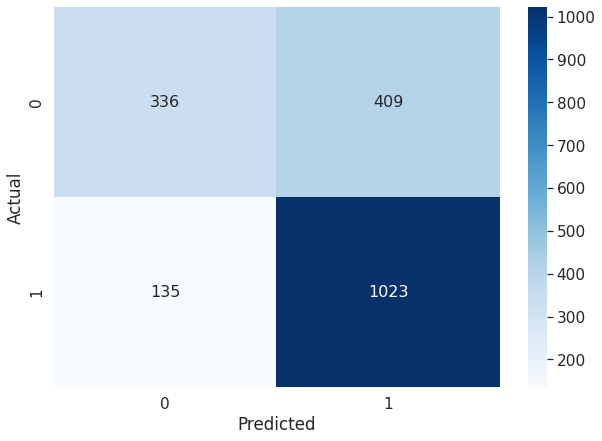

In [ ]:
# Make predictions with the model
predictions2, raw_outputs2 = model2.predict(df_test["text"])
#Evaluate the model on Testing  data 
fscore='{:.2%}\n'.format(f1_score(df_test["label"], predictions2, average='macro'))
ACC='{:.2%}\n'.format(accuracy_score(df_test["label"], predictions2))
pre='{:.2%}\n'.format(precision_score(df_test["label"], predictions2, average='macro'))
recall='{:.2%}\n'.format(recall_score(df_test["label"], predictions2, average='macro'))

print("\U0001F606"*10+"Evaluate the model on validation  data"+"\U0001F606"*10)
print("accuracy_score="+ACC)
print("precision_score="+pre)
print("f1_score="+fscore)
print("recall_score="+recall)

print("\U0001F606"*10+"classification_report"+"\U0001F606"*10)
print(classification_report(predictions2, df_test["label"],digits=4))
print(confusion_ma(df_test["label"],predictions2))

In [ ]:
# Train the model
model3.train_model(df_train)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:390: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/7610 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/476 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/476 [00:00<?, ?it/s]

(952, 0.556839652046436)

  0%|          | 0/1903 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

😆😆😆😆😆😆😆😆😆😆Evaluate the model on validation  data😆😆😆😆😆😆😆😆😆😆
accuracy_score=68.16%

precision_score=67.27%

f1_score=62.96%

recall_score=62.99%

😆😆😆😆😆😆😆😆😆😆classification_report😆😆😆😆😆😆😆😆😆😆
              precision    recall  f1-score   support

           0     0.3919    0.6562    0.4908       445
           1     0.8679    0.6893    0.7683      1458

    accuracy                         0.6816      1903
   macro avg     0.6299    0.6727    0.6296      1903
weighted avg     0.7566    0.6816    0.7034      1903

None


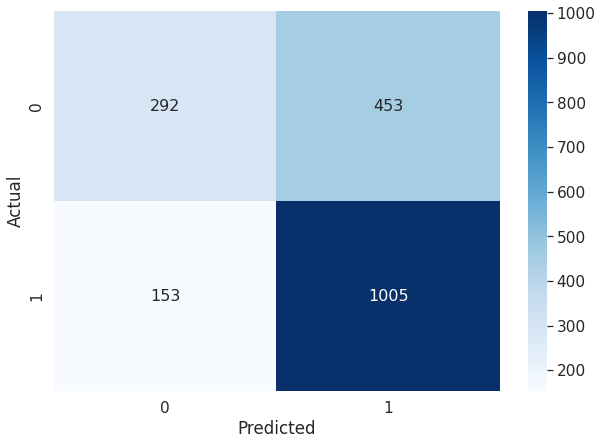

In [ ]:
# Make predictions with the model
predictions3, raw_outputs3 = model3.predict(df_test["text"])
#Evaluate the model on Testing  data 
fscore='{:.2%}\n'.format(f1_score(df_test["label"], predictions3, average='macro'))
ACC='{:.2%}\n'.format(accuracy_score(df_test["label"], predictions3))
pre='{:.2%}\n'.format(precision_score(df_test["label"], predictions3, average='macro'))
recall='{:.2%}\n'.format(recall_score(df_test["label"], predictions3, average='macro'))
print("\U0001F606"*10+"Evaluate the model on validation  data"+"\U0001F606"*10)
print("accuracy_score="+ACC)
print("precision_score="+pre)
print("f1_score="+fscore)
print("recall_score="+recall)

print("\U0001F606"*10+"classification_report"+"\U0001F606"*10)
print(classification_report(predictions3, df_test["label"],digits=4))
print(confusion_ma(df_test["label"],predictions3))